In [64]:
import networkx as nx
import numpy as np
import requests
import matplotlib.pyplot as plt
from collections import Counter
from io import BytesIO

url = "https://raw.githubusercontent.com/fridapfrandsen/network-data/main/rock_network.gexf"

response = requests.get(url)
response.raise_for_status()

G = nx.read_gexf(BytesIO(response.content))
G_undirected = G.to_undirected()

# Part 1: Analyze the network
---

* Present an analysis/description of the network of bands/artists using tools from Lecture 5. Imagine that you have been tasked with presenting the important facts about the network to an audience who knows about network science, but doesn't know about this particular network.

    * It's OK to also use basic concepts like degree distributions (even though they're from week 4) in your analysis. That way you can make the analysis a standalone, coherent thing.

We start by looking into 
- Network size (nodes and edges)
- Degree distributions (in/out for directed graphs)
- Average shortest path length

In [65]:
n_nodes = G.number_of_nodes()
n_edges = G.number_of_edges()
n_edges_undir = G_undirected.number_of_edges()
density = 2 * n_edges / (n_nodes * (n_nodes - 1))

in_degrees = [d for n, d in G.in_degree()]
out_degrees = [d for n, d in G.out_degree()]

avg_in = sum(in_degrees) / len(in_degrees)
avg_out = sum(out_degrees) / len(out_degrees)


print(f"Number of nodes: {n_nodes}")
print(f"Number of edges: {n_edges}")
print(f"Number of edges: {n_edges_undir}")
print(f"Average degree of undirected: {2 * G_undirected.number_of_edges() / G_undirected.number_of_nodes():.2f}")
print(f"Average in and out-degree:  {avg_in:.2f}")
print(f"Density of graph: {density}")



Number of nodes: 484
Number of edges: 7283
Number of edges: 5987
Average degree of undirected: 24.74
Average in and out-degree:  15.05
Density of graph: 0.062308574166281674


We have 484 artists in our network with 7283 edegs in the direkted nwtwork. In the undirekted graph there is only 5987 edges that means there is more that 1000 times where tow artists link to each other this is not a suprise sinse we would ekspekt rock musisisions that have colabed on somthing would refer to each other. We can also conclude that almost 5000 times a wiki page refurs to an other page with out the other page refuring back. We can also note that that arund 6% of all possible node pairs are connected.

In [66]:
print("\nIn-Degree Statistics:")
print(f"  Average: {np.mean(in_degrees):.2f}")
print(f"  Median: {np.median(in_degrees):.2f}")
print(f"  Mode: {Counter(in_degrees).most_common(1)[0][0]}")
print(f"  Min: {np.min(in_degrees)}")
print(f"  Max: {np.max(in_degrees)}")
print(f"  Std Dev: {np.std(in_degrees):.2f}")

print("\nOut-Degree Statistics:")
print(f"  Average: {np.mean(out_degrees):.2f}")
print(f"  Median: {np.median(out_degrees):.2f}")
print(f"  Mode: {Counter(out_degrees).most_common(1)[0][0]}")
print(f"  Min: {np.min(out_degrees)}")
print(f"  Max: {np.max(out_degrees)}")
print(f"  Std Dev: {np.std(out_degrees):.2f}")


In-Degree Statistics:
  Average: 15.05
  Median: 10.00
  Mode: 3
  Min: 0
  Max: 119
  Std Dev: 16.98

Out-Degree Statistics:
  Average: 15.05
  Median: 13.00
  Mode: 12
  Min: 0
  Max: 73
  Std Dev: 10.54


We can se that the In-Degree differs more that the out-degree. This can properbly be eksplaind by many refurs the the lager bands and this will therefor have many a large indegree but most bands have a few in-Degree edges. The Out-Degree is less variant and that is probaly bcause most band refurs to a cupel of bands. 

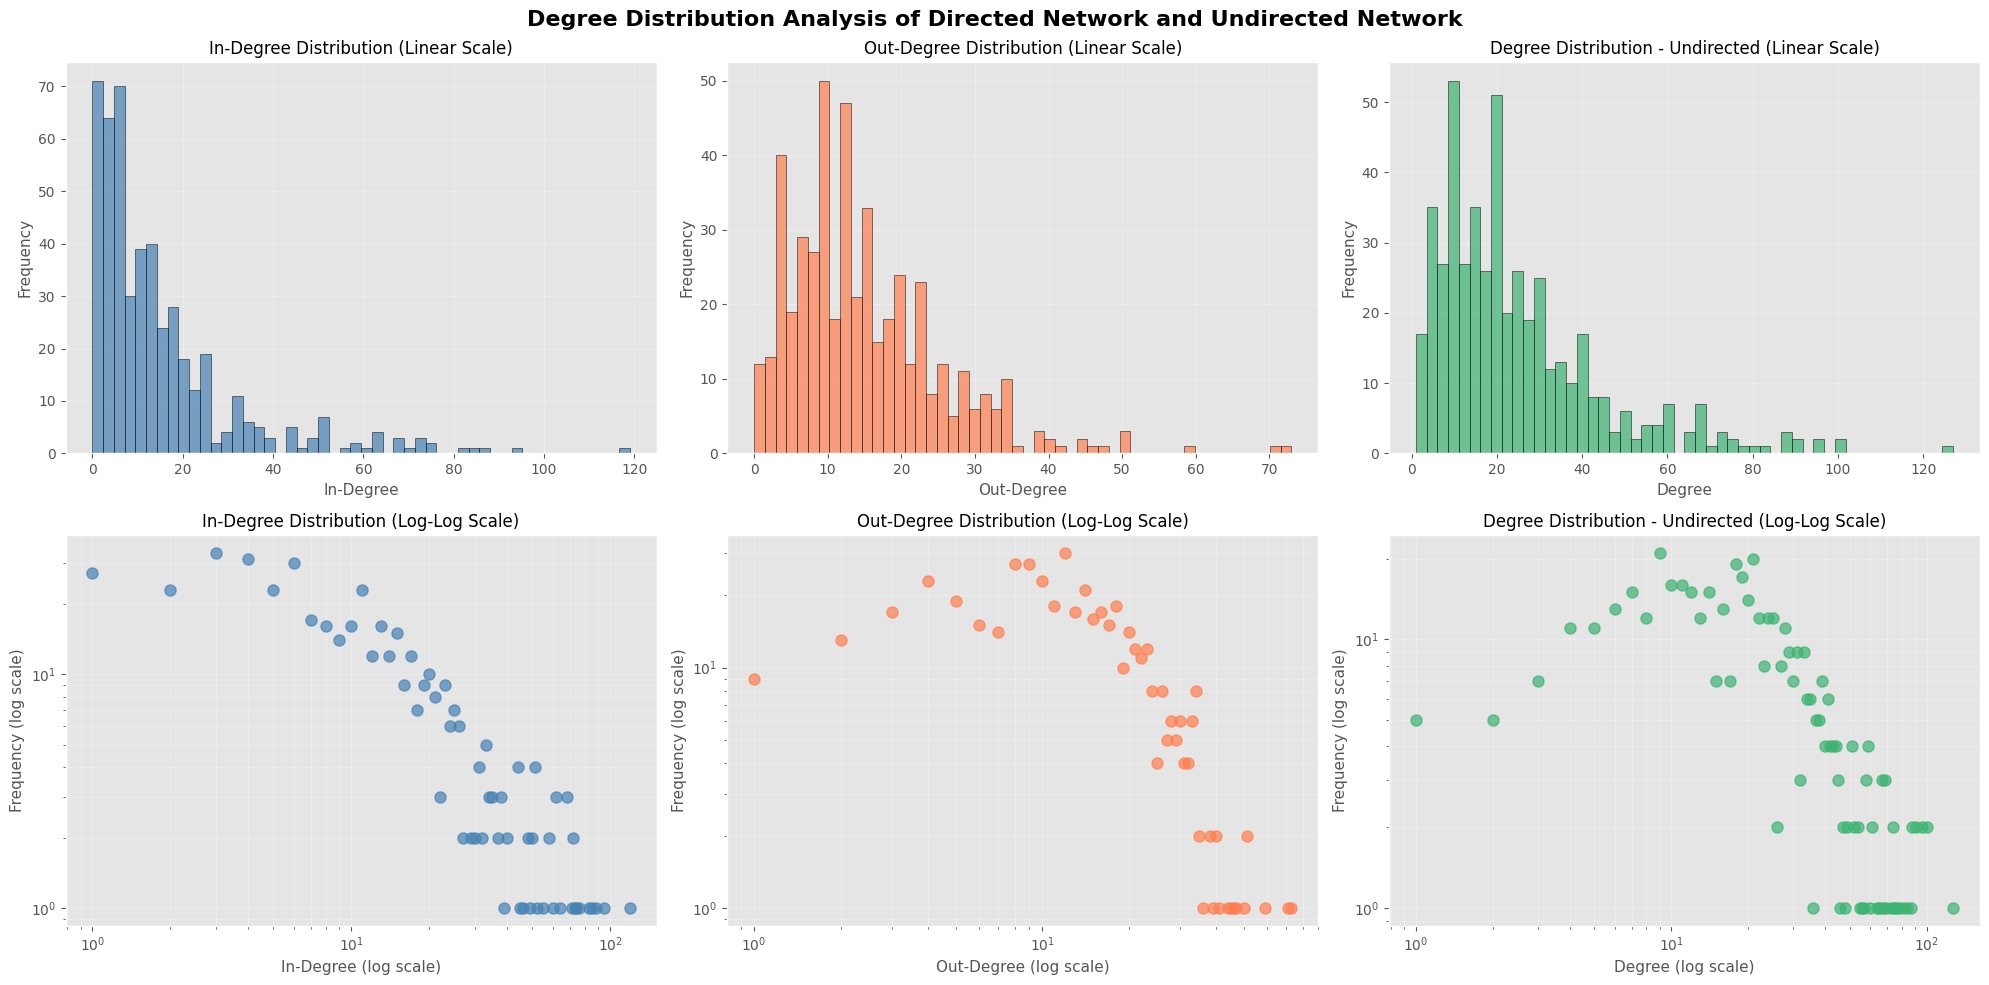

In [67]:
# Create visualizations
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
fig.suptitle('Degree Distribution Analysis of Directed Network and Undirected Network', fontsize=16, fontweight='bold')
degrees = [d for n, d in G_undirected.degree()]

# In-degree distribution (linear scale)
axes[0, 0].hist(in_degrees, bins=50, alpha=0.7, color='steelblue', edgecolor='black')
axes[0, 0].set_xlabel('In-Degree', fontsize=11)
axes[0, 0].set_ylabel('Frequency', fontsize=11)
axes[0, 0].set_title('In-Degree Distribution (Linear Scale)', fontsize=12)
axes[0, 0].grid(True, alpha=0.3)

# Out-degree distribution (linear scale)
axes[0, 1].hist(out_degrees, bins=50, alpha=0.7, color='coral', edgecolor='black')
axes[0, 1].set_xlabel('Out-Degree', fontsize=11)
axes[0, 1].set_ylabel('Frequency', fontsize=11)
axes[0, 1].set_title('Out-Degree Distribution (Linear Scale)', fontsize=12)
axes[0, 1].grid(True, alpha=0.3)

# Undirected degree distribution (linear scale)
axes[0, 2].hist(degrees, bins=50, alpha=0.7, color='mediumseagreen', edgecolor='black')
axes[0, 2].set_xlabel('Degree', fontsize=11)
axes[0, 2].set_ylabel('Frequency', fontsize=11)
axes[0, 2].set_title('Degree Distribution - Undirected (Linear Scale)', fontsize=12)
axes[0, 2].grid(True, alpha=0.3)

# In-degree distribution (log-log scale)
in_degree_counts = Counter(in_degrees)
degrees_in = sorted(in_degree_counts.keys())
counts_in = [in_degree_counts[d] for d in degrees_in]
axes[1, 0].loglog(degrees_in, counts_in, 'o', alpha=0.7, color='steelblue', markersize=8)
axes[1, 0].set_xlabel('In-Degree (log scale)', fontsize=11)
axes[1, 0].set_ylabel('Frequency (log scale)', fontsize=11)
axes[1, 0].set_title('In-Degree Distribution (Log-Log Scale)', fontsize=12)
axes[1, 0].grid(True, alpha=0.3, which='both')

# Out-degree distribution (log-log scale)
out_degree_counts = Counter(out_degrees)
degrees_out = sorted(out_degree_counts.keys())
counts_out = [out_degree_counts[d] for d in degrees_out]
axes[1, 1].loglog(degrees_out, counts_out, 'o', alpha=0.7, color='coral', markersize=8)
axes[1, 1].set_xlabel('Out-Degree (log scale)', fontsize=11)
axes[1, 1].set_ylabel('Frequency (log scale)', fontsize=11)
axes[1, 1].set_title('Out-Degree Distribution (Log-Log Scale)', fontsize=12)
axes[1, 1].grid(True, alpha=0.3, which='both')

# Undirected degree distribution (log-log scale)
degree_counts = Counter(degrees)
degree_vals = sorted(degree_counts.keys())
counts = [degree_counts[d] for d in degree_vals]
axes[1, 2].loglog(degree_vals, counts, 'o', alpha=0.7, color='mediumseagreen', markersize=8)
axes[1, 2].set_xlabel('Degree (log scale)', fontsize=11)
axes[1, 2].set_ylabel('Frequency (log scale)', fontsize=11)
axes[1, 2].set_title('Degree Distribution - Undirected (Log-Log Scale)', fontsize=12)
axes[1, 2].grid(True, alpha=0.3, which='both')


plt.tight_layout()


The In-Degree distribution looks more like a scale free network where the most commen degree is the lower. The Out-Degree distibution is more like a random network where the frequency is more normal distributed around 13. The undirected degree frequency looks like a distrubutioon between scale free network and random network but defendly have the loge tail we know from scale free network. 

In [68]:
# Calculate the probability of connection for random graph
p = n_edges / (n_nodes * (n_nodes - 1))

G_undirected = G.to_undirected()

G_random = nx.gnp_random_graph(n_nodes, p)
G_ = nx.watts_strogatz_graph(500, 4, 0)

G_Largest_connected_subgraph = G_undirected.subgraph(max(nx.connected_components(G_undirected), key=len)).copy()
G_random_Largest_connected_subgraph = G_random.subgraph(max(nx.connected_components(G_random), key=len)).copy()


print(f"our network average shortest path: {nx.average_shortest_path_length(G_Largest_connected_subgraph):.2f}")
print(f"random network average shortest path: {nx.average_shortest_path_length(G_random_Largest_connected_subgraph):.2f}")


our network average shortest path: 2.37
random network average shortest path: 2.58


we can se our network have a shotere average shortest path than a radom network wich means there must be some clusters or hubs

Is this important???

## Centralities and assortativity

In [69]:
# Degree centrality
degree_centrality = nx.degree_centrality(G)

# Betweenness centrality
betweenness_centrality = nx.betweenness_centrality(G)

# Eigenvector centrality
eigenvector_centrality = nx.eigenvector_centrality(G_undirected)

# Print summary stats
print(f"Average degree centrality:      {sum(degree_centrality.values())/len(degree_centrality):.4f}")
print(f"Average betweenness centrality: {sum(betweenness_centrality.values())/len(betweenness_centrality):.4f}")
print(f"Average eigenvector centrality: {sum(eigenvector_centrality.values())/len(eigenvector_centrality):.4f}")

assort = nx.degree_assortativity_coefficient(G)
print(f"Degree assortativity: {assort:.4f}")

Average degree centrality:      0.0623
Average betweenness centrality: 0.0036
Average eigenvector centrality: 0.0343
Degree assortativity: 0.0376


The quet low betweeness centrality indicates that only a few notes are importen briges and most edges not often lies on the shortes path. The Eigenvector Centrality repeseds how large each node conektions are. Therefor the quet low eigenvector centrality indicates only a limeted subset is structurally influential. 

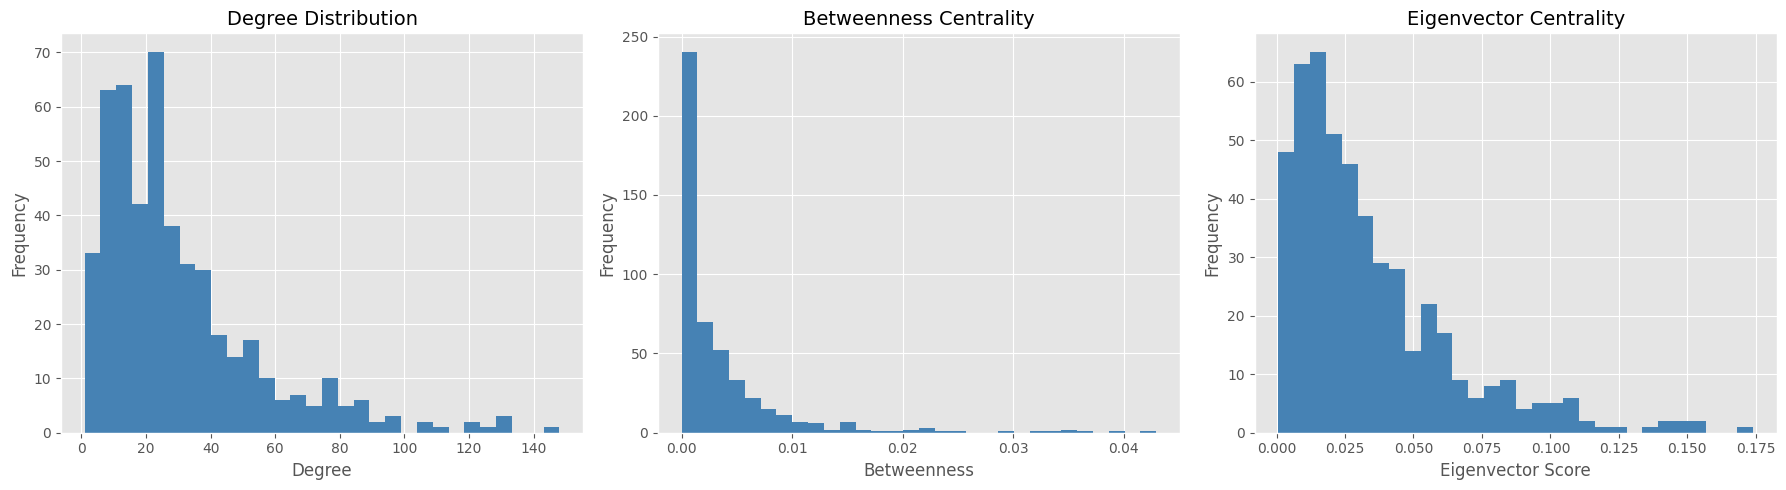

In [70]:
plt.style.use("ggplot")   # nicer default style

degree_vals = [deg for _, deg in G.degree()]
betweenness_vals = list(betweenness_centrality.values())
eigenvector_vals = list(eigenvector_centrality.values())

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
color = "steelblue"

# Degree
axes[0].hist(degree_vals, bins=30, color=color)
axes[0].set_title("Degree Distribution", fontsize=14)
axes[0].set_xlabel("Degree", fontsize=12)
axes[0].set_ylabel("Frequency", fontsize=12)

# Betweenness
axes[1].hist(betweenness_vals, bins=30, color=color)
axes[1].set_title("Betweenness Centrality", fontsize=14)
axes[1].set_xlabel("Betweenness", fontsize=12)
axes[1].set_ylabel("Frequency", fontsize=12)

# Eigenvector
axes[2].hist(eigenvector_vals, bins=30, color=color)
axes[2].set_title("Eigenvector Centrality", fontsize=14)
axes[2].set_xlabel("Eigenvector Score", fontsize=12)
axes[2].set_ylabel("Frequency", fontsize=12)

plt.tight_layout()
plt.show()




Moste nodes(Rock Musicians) have a betweennesss Centrality of almost 0 and therefor are not a ceentral brige role sice they are almost never on the average shortest path. Very few nodes(Rock Musicians) are briges between clusters. Most nodes have low eigenvector centrality and are therefor coneccted with smal clusters there are not influential. Some nodes are in betwwen and have some a little influential conections. Then there is a few nodes with higer eigenvector centrality and therefor have connections to the most influential part of the network.

* Use a network backbone in your analysis

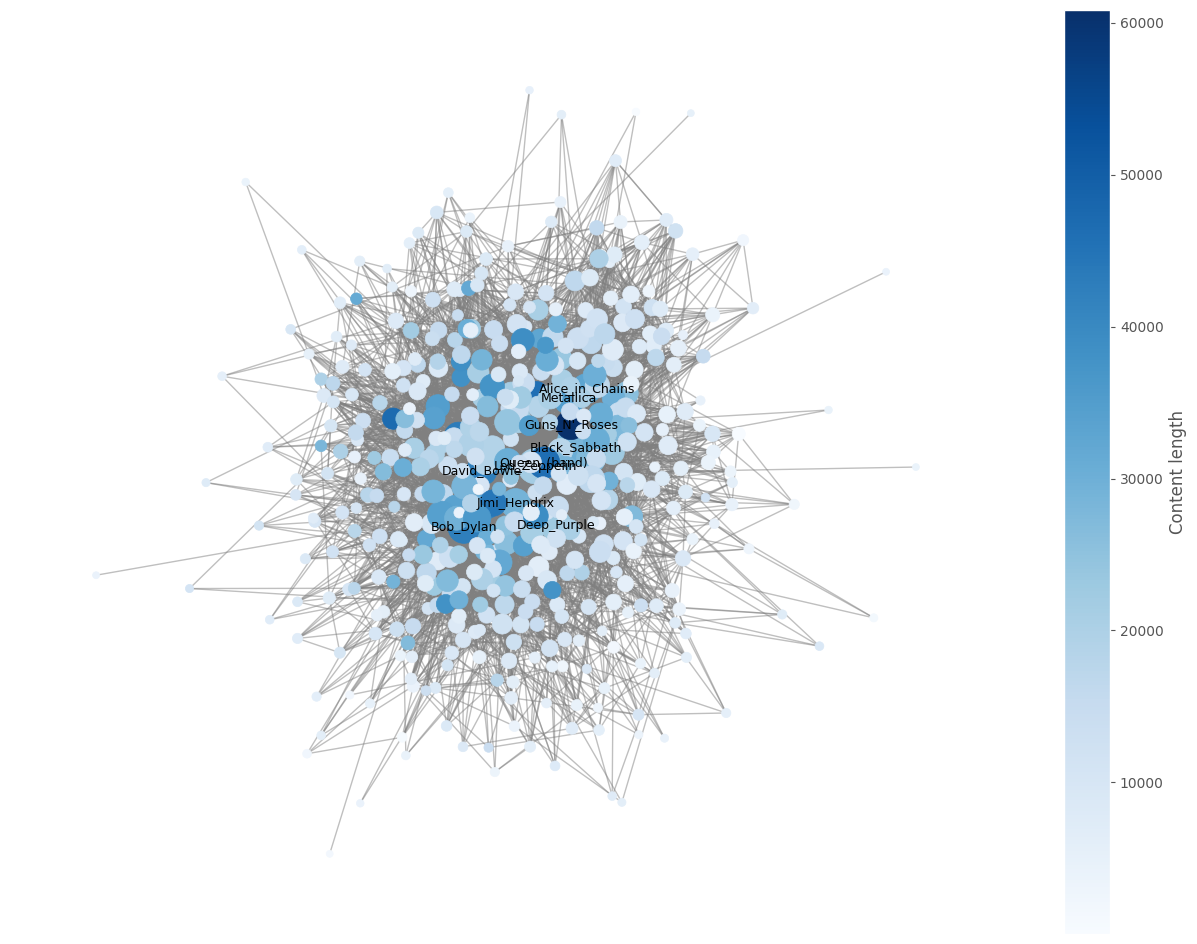

In [98]:
# Node size based on degree (moderate scaling)
degrees = dict(G_undirected.degree())
node_sizes = [20 + deg * 5 for deg in degrees.values()] 

# Node colors based on content length
content_lengths = nx.get_node_attributes(G_undirected, "len_of_content")
node_colors = [content_lengths.get(n, 0) for n in G_undirected.nodes()]


plt.figure(figsize=(16,12))
pos = nx.spring_layout(G_undirected, seed=40)


nx.draw_networkx_edges(G_undirected, pos, edge_color="gray", alpha=0.5)


nodes = nx.draw_networkx_nodes(G_undirected, pos, node_size=node_sizes, node_color=node_colors, cmap=plt.cm.Blues)

# Label only the top nodes by degree (top 10)
top_nodes = sorted(degrees, key=degrees.get, reverse=True)[:10]
labels = {n: n for n in top_nodes}
nx.draw_networkx_labels(G_undirected, pos, labels, font_size=9, font_weight='normal')  

plt.colorbar(nodes, label="Content length")

plt.axis("off")
plt.show()

In [72]:
def backbone_low_betweenness(G_undirected, n_remove):
    # Work on a copy
    Gb = G_undirected.copy()

    # Compute edge betweenness
    ebc = nx.edge_betweenness_centrality(Gb)

    # Sort edges: lowest betweenness first
    edges_sorted = sorted(ebc.items(), key=lambda x: x[1])

    # Select lowest n_remove edges
    edges_to_remove = [edge for edge, score in edges_sorted[:n_remove]]

    # Remove edges
    Gb.remove_edges_from(edges_to_remove)

    # Remove isolated nodes
    isolated = list(nx.isolates(Gb))
    Gb.remove_nodes_from(isolated)

    return Gb


# --- Run ---
G_backbone = backbone_low_betweenness(G_undirected, n_remove=int(G_undirected.number_of_edges()*0.85))


print("Nodes:", G_backbone.number_of_nodes())
print("Edges:", G_backbone.number_of_edges())



Nodes: 440
Edges: 899


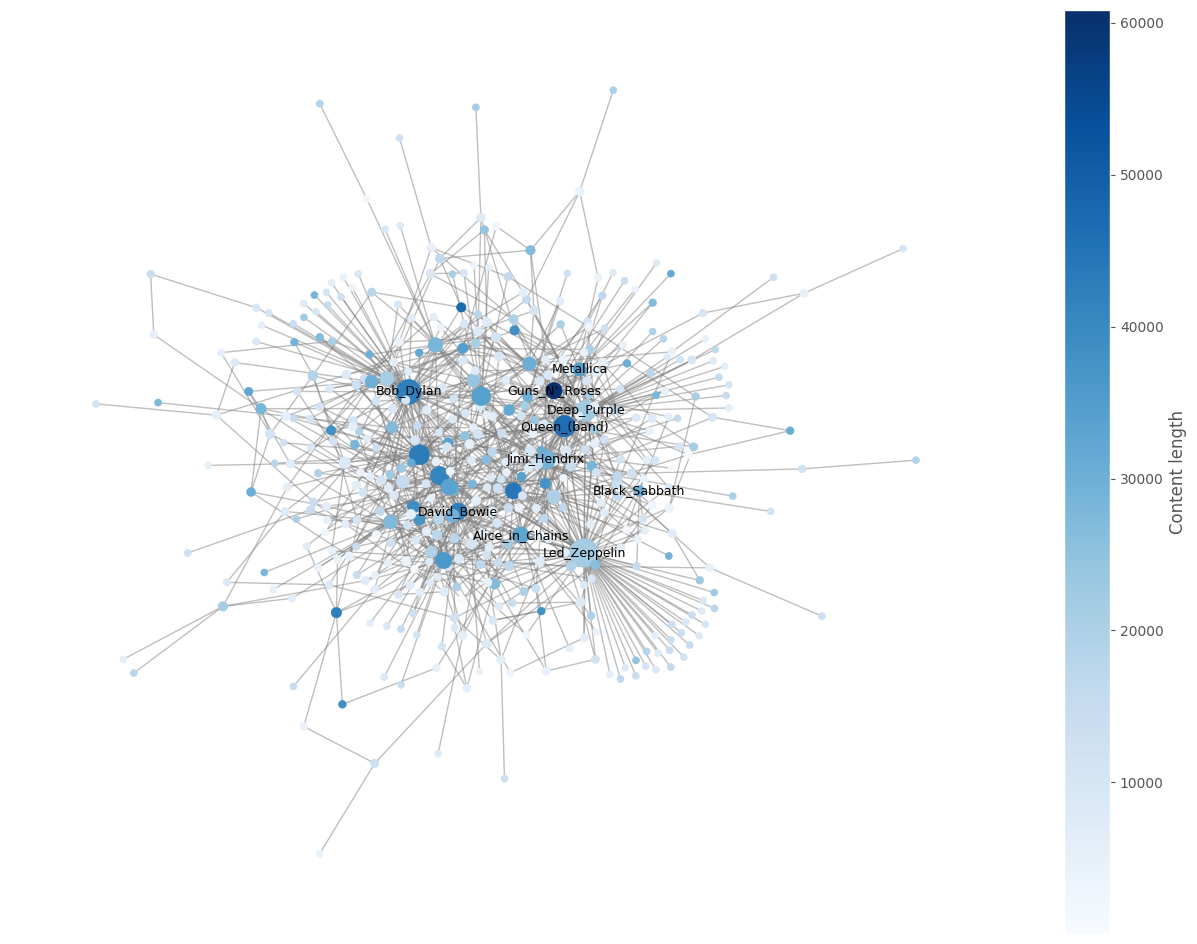

In [97]:
# Node size based on degree (moderate scaling)
degrees_backbone = dict(G_backbone.degree())
node_sizes = [20 + degrees_backbone[n] * 5 for n in G_backbone.nodes()]

# Node colors based on content length
content_lengths = nx.get_node_attributes(G_backbone, "len_of_content")
node_colors = [content_lengths.get(n, 0) for n in G_backbone.nodes()]


plt.figure(figsize=(16,12))
pos = nx.spring_layout(G_backbone, seed=40)


nx.draw_networkx_edges(G_backbone, pos, edge_color="gray", alpha=0.5)


nodes = nx.draw_networkx_nodes(G_backbone, pos, node_size=node_sizes, node_color=node_colors, cmap=plt.cm.Blues)

# Label only the top nodes by degree (top 10)
top_nodes_backbone = sorted(degrees_backbone, key=degrees.get, reverse=True)[:10]
labels = {n: n for n in top_nodes_backbone}
nx.draw_networkx_labels(G_backbone, pos, labels, font_size=9, font_weight='normal')  

plt.colorbar(nodes, label="Content length")

plt.axis("off")
plt.show()

We have plotted the network befor and after we have removed 85% og the edges and then removed the nodes there are no longer connected. We have choosen to remove the edes with the lowest betweenness_centrality. We can now see the network more clear and wish nodes have most structural influance.  